## Problem 1
Implement the Kernigan-Lin algorithm. Test it in the problem of separation of the two independent Erdos-Renyi networks connected by several bridges  

In [36]:
import networkx as nx
import random

In [38]:
def Kernigan_Lin_algo(G, n_part, n_rounds):
    nodes = list(G.nodes())
    n = G.number_of_nodes()
    n1 = min(n_part, n - n_part)
    n2 = n - n1

    group_1 = random.sample(nodes, k = n1)
    group_2 = [x for x in nodes if not x in group_1]
    cut_size = cut_size_calc(G, group_1, group_2)

    for i in range(n_rounds):
        print(i)
        groups_list = [group_1.copy()]
        cut_sizes_list = [cut_size]

        nodes_dict = {node: False for node in nodes}
        sum_1 = sum([nodes_dict[node] for node in group_1])
        sum_2 = sum([nodes_dict[node] for node in group_2])
        while (sum_1 < n1 and sum_2 < n2 ):
            nodes_1_list = [x for x in group_1 if not nodes_dict[x]]
            nodes_2_list = [x for x in group_2 if not nodes_dict[x]]
            cut_sizes_tmp = {}
            for node_1 in nodes_1_list:
                for node_2 in nodes_2_list:
                    g1_tmp = group_1.copy()
                    g1_tmp.remove(node_1)
                    g1_tmp.append(node_2)

                    g2_tmp = group_2.copy()
                    g2_tmp.remove(node_2)
                    g2_tmp.append(node_1)
                    cut_size_tmp = cut_size_calc(G, g1_tmp, g2_tmp)
                    cut_sizes_tmp[(node_1, node_2)] = cut_size_tmp

            (node_1,node_2), cut_size = min(cut_sizes_tmp.items(), key = lambda x: x[1])
            group_1.remove(node_1)
            group_1.append(node_2)
            group_2.remove(node_2)
            group_2.append(node_1)
            nodes_dict[node_1] = True
            nodes_dict[node_2] = True
            sum_1 = sum([nodes_dict[node] for node in group_1])
            sum_2 = sum([nodes_dict[node] for node in group_2])
            groups_list.append(group_1.copy())
            cut_sizes_list.append(cut_size)
        index_min = cut_sizes_list.index(min(cut_sizes_list))
        group_1 = groups_list[index_min]
        group_2 = [x for x in nodes if not x in group_1]
    return group_1, group_2

In [37]:
def cut_size_calc(G, group1, group2):
    cut_size = 0
    for u, v in G.edges():
        if ((u in group1 and v in group2) or (u in group2 and v in group1)):
            cut_size += 1
    return cut_size
    

In [64]:
G1 = nx.erdos_renyi_graph(30, 0.2)
G2 = nx.erdos_renyi_graph(20, 0.2)
n1 = G1.number_of_nodes()
G = nx.Graph()

for u, v in G1.edges():
    G.add_edge(u,v)
for u, v in G2.edges():
    G.add_edge(n1+u, n1+v)

n_bridges = 20
for i in range(n_bridges):
    G.add_edge(i, n1+i)
G.number_of_nodes()

50

In [65]:
group_1, group_2 = Kernigan_Lin_algo(G, n1, 10)

0
1
2
3
4
5
6
7
8
9


In [66]:
cut_size_calc(G, group_1, group_2)

34

In [46]:
sorted(group_1)

[30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [47]:
sorted(group_2)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

## Problem 2
Implement the Spectral partitioning algorithm. Test it in the problem of separation of the two independent Erdos-Renyi networks connected by several bridges  

In [49]:
import numpy as np

In [50]:
def spectral_algo(G, n_part):
    nodes = list(G.nodes())
    n = G.number_of_nodes()
    n1 = min(n_part, n - n_part)
    n2 = n - n1
    
    A = nx.adjacency_matrix(G)
    D = np.diag(list(dict(G.degree()).values()))
    L = D - A
    
    values, vectors = np.linalg.eig(L)
    v2 = min([v for v in values if v > 1e-10])
    index = list(values).index(v2)
    vect = np.array(np.transpose(vectors[:,index]))[0]
    vect_items = [(nodes[i],vect[i]) for i in range(G.number_of_nodes())]
    vect_items = sorted(vect_items, key = lambda x: x[1], reverse=True)

    group_1_1 = [x[0] for x in vect_items[:n1]]
    group_2_1 = [x for x in nodes if not x in group_1_1]
    cut_size_1 = cut_size_calc(G,group_1_1, group_2_1)
    
    group_1_2 = [x[0] for x in vect_items[:n2]]
    group_2_2 = [x for x in nodes if not x in group_1_2]
    cut_size_2 = cut_size_calc(G,group_1_2, group_2_2)
    
    if cut_size_1 > cut_size_2:
        return group_1_2, group_2_2
    
    return group_1_1, group_2_1

In [61]:
G1 = nx.erdos_renyi_graph(30, 0.2)
G2 = nx.erdos_renyi_graph(20, 0.2)
n1 = G1.number_of_nodes()
G = nx.Graph()

for u, v in G1.edges():
    G.add_edge(u,v)
for u, v in G2.edges():
    G.add_edge(n1+u, n1+v)

n_bridges = 20
for i in range(n_bridges):
    G.add_edge(i, G1.number_of_nodes()+i)

G.number_of_nodes()

50

In [62]:
group_1, group_2 = spectral_algo(G, n1)

In [63]:
cut_size_calc(G, group_1, group_2)

37

In [54]:
len(group_1)

20

In [55]:
len(group_2)

30

In [56]:
sorted(group_1)

[30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [57]:
sorted(group_2)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

## Problem 3
Resolve the problem of identification of the three independent Erdos-Renyi networks connected by several bridges  

In [67]:
G1 = nx.erdos_renyi_graph(30, 0.2)
G2 = nx.erdos_renyi_graph(30, 0.2)
G3 = nx.erdos_renyi_graph(30, 0.2)

n1 = G1.number_of_nodes()
n2 = G2.number_of_nodes()

G = nx.Graph()

for u, v in G1.edges():
    G.add_edge(u,v)
for u, v in G2.edges():
    G.add_edge(n1+u, n1+v)
for u, v in G3.edges():
    G.add_edge(n1+n2+u, n1+n2+v)

n_bridges = 20
for i in range(n_bridges):
    if i < n_bridges / 2:
        G.add_edge(i, n1+i)
    else:
        G.add_edge(i, n1+n2+i)

G.number_of_nodes()

90

In [68]:
ini_group_1, ini_group_2 = spectral_algo(G, n1)

In [69]:
if len(ini_group_1) == n1:
    group_1 = ini_group_1.copy()
else:
    group_1 = ini_group_2.copy()

In [70]:
sorted(group_1)

[60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89]

In [71]:
G_tmp = G.copy()
for node in group_1:
    G_tmp.remove_node(node)
group_2, group_3 = spectral_algo(G_tmp, n2)

In [72]:
sorted(group_2)

[30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [73]:
sorted(group_3)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

## Problem 4
Analyze how spectral partitioning into two equal sizes works for the Erdos-Renyi graph with different density. Compare the results with the cases of random partition. 

In [74]:
p_list = [x/10 for x in range(1,10)]
n = 100
n1 = n // 2

n_random = 100
cs_list = []

cs_list_random_mean = []
cs_list_random_sd = []

for p in p_list:
    print(p)
    G = nx.erdos_renyi_graph(n, p)
    group_1, group_2 = spectral_algo(G, n1)
    cs = cut_size_calc(G, group_1, group_2)
    cs_list.append(cs)
    
    nodes = list(G.nodes())
    cs_random_tmp = []
    for _ in range(n_random):
        group_1 = random.sample(nodes, k = n1)
        group_2 = [x for x in nodes if not x in group_1]
        cs_random = cut_size_calc(G, group_1, group_2)
        cs_random_tmp.append(cs_random)
    cs_list_random_mean.append(np.mean(cs_random_tmp))
    cs_list_random_sd.append(np.std(cs_random_tmp))

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [75]:
import matplotlib.pyplot as plt

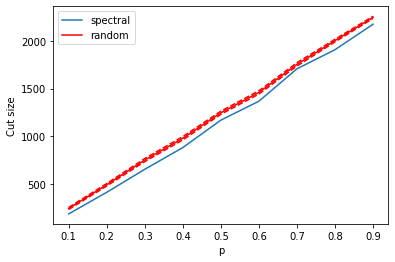

In [76]:
plt.plot(p_list, cs_list, label = 'spectral')
plt.plot(p_list, cs_list_random_mean, color = 'red', label = 'random')
plt.plot(p_list, [cs_list_random_mean[i] - cs_list_random_sd[i] for i in range(len(p_list))], color = 'red', ls = '--')
plt.plot(p_list, [cs_list_random_mean[i] + cs_list_random_sd[i] for i in range(len(p_list))], color = 'red', ls = '--')
plt.xlabel('p')
plt.ylabel('Cut size')
plt.legend()

In [77]:
p_list = [x/10 for x in range(1,10)]
n = 100
n1 = n // 2

n_random = 100
cs_list = []

cs_list_random_mean = []
cs_list_random_sd = []

for p in p_list:
    print(p)
    G1 = nx.erdos_renyi_graph(n1, p)
    G2 = nx.erdos_renyi_graph(n1, p)
    G = nx.Graph()

    for u, v in G1.edges():
        G.add_edge(u,v)
    for u, v in G2.edges():
        G.add_edge(n1+u, n1+v)

    n_bridges = 40
    for i in range(n_bridges):
        G.add_edge(i, G1.number_of_nodes()+i)

    group_1, group_2 = spectral_algo(G, n1)
    cs = cut_size_calc(G, group_1, group_2)
    cs_list.append(cs)
    
    nodes = list(G.nodes())
    cs_random_tmp = []
    for _ in range(n_random):
        group_1 = random.sample(nodes, k = n1)
        group_2 = [x for x in nodes if not x in group_1]
        cs_random = cut_size_calc(G, group_1, group_2)
        cs_random_tmp.append(cs_random)
    cs_list_random_mean.append(np.mean(cs_random_tmp))
    cs_list_random_sd.append(np.std(cs_random_tmp))

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


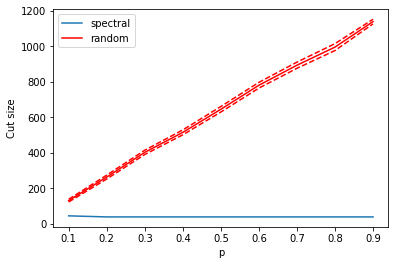

In [78]:
plt.plot(p_list, cs_list, label = 'spectral')
plt.plot(p_list, cs_list_random_mean, color = 'red', label = 'random')
plt.plot(p_list, [cs_list_random_mean[i] - cs_list_random_sd[i] for i in range(len(p_list))], color = 'red', ls = '--')
plt.plot(p_list, [cs_list_random_mean[i] + cs_list_random_sd[i] for i in range(len(p_list))], color = 'red', ls = '--')
plt.xlabel('p')
plt.ylabel('Cut size')
plt.legend()

In [ ]:
cs_list